In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

-------
_Faculté des Sciences de Sorbonne Université & Arts et Métiers ParisTech: Master 2 SPI - Model and numerical simulation in aeroeslasticity_ (2021-2022)

## Class Note 4: Theodorsen's unsteady aerodynamic operator

The aim of this notebook is to present one of the most popular theory used to model **incompressible harmonic
unsteady flows** due to PAPA motion, namely the **Theordorsen's potential solution**. 

------------------------

_Jean-Camille Chassaing, Sorbonne Université , released 10. Oct.  2021 (v5b)_

http://www.dalembert.upmc.fr/home/chassaing


-------

In [3]:
import numpy as np
from IPython.display import Image
from scipy.optimize  import fsolve
from pylab           import *
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

-------

## Introduction - Framework

$\bullet$ As seen previously, considering steady aerodynamics $L(\alpha,\rho_\infty,M_\infty)$ in the flutter solution gives unacceptable results for efficient design of flutter margin.

$\bullet$ Therefore taking into account for inertial and  unsteady effects $L(\alpha,\dot\alpha,\ddot\alpha,h,\dot h,\ddot h,\rho_\infty,M_\infty)$
is of crucial importance to accurately predict the flutter speed of lifting surface. 

$\bullet$ However, obtaining an analytical solution of the aerodynamic forces acting on a wing performing an arbitrary movement is not an easy task.  

$\bullet$ One approach to raise this difficulty is to assume that unstable forces can be modeled by a **harmonic motion**.

## Problem statement

Let us start from the dynamic equation of motion written using generalized coordinates without taking into account for structural viscous damping (see Class Note 3)
$$  \mathbf{M_S} \ddot{\mathbf{q}} + \mathbf{K_S} \mathbf{q} = \mathbf{F_{aero}(\ddot{\mathbf{q}},\dot{\mathbf{q}},\mathbf{q})}
$$

Now we considerer the particular case where the displacements of the elastically moving airfoil
are  described by **harmonic oscillations**. Therefore, the generalised coordinates are defined by
$$ \mathbf q = \mathbf{\bar q} ~\text {exp}(i\omega t) $$

with $\omega$ the circular frequency of the aeroelastic motion, the aerodynamic forces will be sough in the following form (associated to coordinates behavior just above) 
$$ \mathbf F_{aero} = \mathbf{\bar F_{aero}}  ~\text {exp}(i\omega t) \qquad $$

and the aeroelastic governing are expressed in the frequency domain as 

$$  \left( -\omega^2 \mathbf{M_S} + \mathbf{K_S} \right) \mathbf{\bar q}(i\omega) = \mathbf{\bar F_{aero}}(i\omega)
$$

As seen in previous application notebooks the harmonic aerodynamic forces can be derived in the context of steady assumption but resulting in strong limitation in term of operating reduced frequency range. 

In the next section the fully **unsteady  PAPA operator** (**Faero and q not in phase**) from _T.T.  Theodorsen[3]_ is presented. This aerodynamic model is derived from the **potential** flow solution for harmonic motion of a flat plate and was intensivelly employed to compute the flutter determinant of practical PAPA configuration of interest.

## 1 Reduced frequency

The reduced frequency $k$ is a non-dimensional parameter which compares the number of pulsation $\omega$ 
of the structure during the time required by the airflow to travel accross the semi-chord $b$ 
$$ k = \frac{\omega b}{U_\infty} $$

* For steady flows: $k=0$.

* As a consequence, changing the reduced frequency will directlly affect the unsteady lift and moment of a harmonically oscillating airfoil.

## 2 Theodorsen's unsteady flow operator

### 2.1 Assumptions and  Theodorsen solution

By extending the potential  theory to unsteady flows, Theodorsen [3] derived in 1935, an analytical expression for the aerodynamic forces acting on a **harmonically** oscillating **thin airfoil** with **small** amplitudes in an **incompressible** flow


\begin{eqnarray}
    L(t) &=& \underbrace{\pi \rho_\infty b^2 (\ddot h + U_\infty \dot \alpha - a_hb \ddot\alpha)}_{L_{\Gamma=0}: \text {non-circulatory part}}
                + \underbrace{2\pi \rho_\infty U_\infty b C(k)
            \left[ \dot h +U_\infty \alpha + b\left( \frac{1}{2}-a_h\right)\dot\alpha \right]}_{L_{\Gamma\ne 0}: \text {circulatory part}}
             \\
    M_{A}(t) &=& -\pi\rho_\infty b^3
        \left[ \frac{1}{2} \ddot h + U
       \dot \alpha +b\left( \frac{1}{8} -\frac{a_h}{2}\right)\ddot\alpha
        \right]    
 \end{eqnarray} 
 
with b the coord, we look for $U_{\infty}$ at which flutter occurs, C(k) a commplex function depending on the reduced frequency (see above section). Then once given these parameters in addition to h, etc, one can solve the problem (L(t), Ma) at this forced movement.
 
The expression for the lift is constructed as the solution of the **circulatory** term due to the **vorticity** in the flow plus a **non-circulatory** term corresponding to **added mass effects**.
The later corresponds to the change in force and moment due to the acceleration of the displaced  mass of air due to the airfoil motion. The construction of the problem works as for problems with superposition : we superpose different flow to build a more complex (and more accurate) framework.

In hindsight, one can look at the formula when steady (derivatives terms null) to get the value C(0) here. We check previous theory.

### 1.2.2 Governing equation and boundary conditions

Equations (2) correspond to the mathematical solution of the following problem of fluid mechanics:

Assuming $u=U_\infty + u'$ and $u', w' << U_\infty$, we seek the solution of the **Laplace** equation for the  **potential perturbation** $\phi '$ (defined by $\underline \nabla \phi '= \vec u'$)
$$ \nabla^2 \phi '=0$$ 

**with two boundary conditions :**

**1) Impermeability** (or _slip condition_): the flow cannot cross the solid boundary 

The non-circulatory term $L_{\Gamma=0}$  satisfies the boundary condition of the oscillating airfoil
by distributing **sources** on the upper side of the airfoil and **sinks** on the lower size.
This is achieved using **conformal transformation** of the flat plate into a circle in the complex plane.
The strength of the source/sink distributions is defined by the  motion of the airfoil.

The **instantaneous position** is obtained from geometrical considerations 
 \begin{eqnarray}   z_a(x,t) = -h -\alpha (x-a_h b) ~~ \Leftarrow ~~ \underline{z}_a = -h\underline{e}_2 + (x - a_h b(cos(\alpha)\underline{e}_1 - sin(\alpha))\underline{e}_2    \end{eqnarray}

Then, the **upwash velocity** of the airfoil $w_{a}$ reads 

\begin{eqnarray}
w_{a}(x,z=z_a,t) & = & \left.\frac{\partial\phi '}{\partial t}\right|_{z=z_a}~=~\frac{\partial z_{a}}{\partial t}+U
 \frac{\partial z_{a}}{\partial x} \end{eqnarray}
 
**2) Kutta condition**: The velocity at the trailing edge must be equal to zero.

The circulatory term $L_{\Gamma\ne0}$ must satisfy the Kutta condition at the trailing edge.
To this end, a bounded **vorticity** distribution is imposed on the wall surface and the **wake** is modeled usin a free vorticity distribution.

**Pressure difference on the airfoil** : Use of the unsteady linearized Bernoulli  equations
$$ \Delta p'  = p_u' -p_l'= -2 \rho_\infty \left( \frac{\partial \phi '}{\partial t} + U_\infty \frac{\partial \phi '}{\partial x}  \right) $$

**Unsteady lift and moment:** 
 \begin{eqnarray}
 L(t) = 2b\int_0^1 \Delta p'(x) dx;~ M_{E}(t) = 4b^2 \int_0^1 (x-x_{E}) \Delta p'(x) dx
 \end{eqnarray}

### 2.3 Theodorsen lift deficiency function C(k)

We remark the function $C(k)$ in the circulatory term of the lift $L_{\Gamma\ne0}$.
This function is called the **lift deficiency function** (or circulatory function) and depends to the reduced frequency $k$ only.

From a physical point of view, $C(k)$ models the changes in amplitude and phase of the quasi-steady forces according to the wake effects.



The exact expression for $C(k)$, which is  a complex valued function, was established by Theodorsen as [3]
\begin{eqnarray} 
   C(k) = \frac{H_1^{(2)}(k)}{H_1^{(2)}(k) + i H_0^{(2)}(k)}  = F + i G\label{eq_Ck}  
 \end{eqnarray}
where $H_n^{(2)}(k)$ denotes  **Hankel function of second kind of order 2**, with $H_n^{(2)}(k) = J_n(k) - i Y_n(k)$ and $J_n(k)$ et $Y_n(k)$ are the **Bessel functions  of $1^{\text{st}}$ and $2^{\text{nd}}$ kind**
respectively.

In [4]:
def Ctheo_exact(k):
    """Exact expression of the Theodorsen lift function [3]"""
    ic  = np.csingle(1j)
    J1  = special.j1(k)
    J0  = special.j0(k)
    Y1  = special.y1(k)
    Y0  = special.y0(k)
    C   = (J1-ic*Y1)/(J1-ic*Y1+ic*(J0-ic*Y0))
    return C

**Plot of the Theodorsen function**

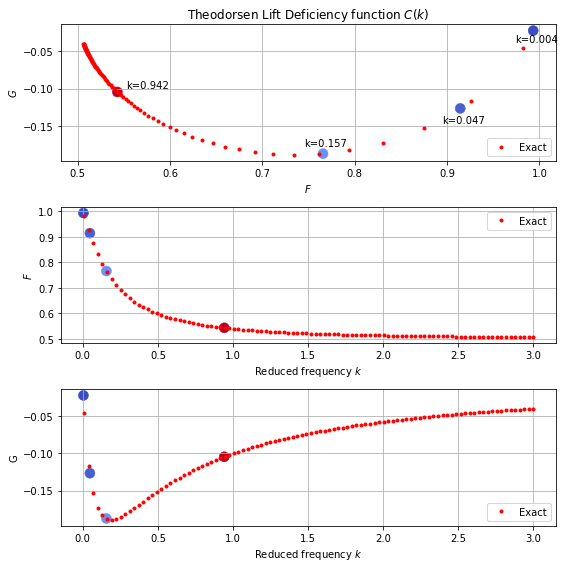

In [5]:
nsize = 100
k_range = np.linspace(0.01, 3, num=nsize) # reduced frequcency

y1 = np.zeros((nsize), dtype=complex)

y1[:] = Ctheo_exact(k_range[:])

fig1 = plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
F_data = np.zeros((4), dtype=float)
G_data = np.zeros((4), dtype=float)

k_red  = np.array([0.004,  0.047, 0.157, 0.942])
F_data [:]= np.real(Ctheo_exact(k_red[:]))
G_data [:]= np.imag(Ctheo_exact(k_red[:]))

#fig1 = plt.figure(figsize=(8,4))
#plt.plot(np.real(y1[:]),np.imag(y1[:]) ,'r--',color="red",label="Exact")
plt.scatter(F_data[:],G_data[:], marker='o', s=100, linewidths=0.5, c=k_red, cmap=plt.cm.coolwarm)

txt0 = 'k='+str(k_red[0]); txt1 = 'k='+str(k_red[1]); txt2 = 'k='+str(k_red[2]); txt3 = 'k='+str(k_red[3])
plt.annotate(txt0, xy=(F_data[0], G_data[0]), xytext=(F_data[0]-0.02, G_data[0]-0.015))
plt.annotate(txt1, xy=(F_data[1], G_data[1]), xytext=(F_data[1]-0.02, G_data[1]-0.02))
plt.annotate(txt2, xy=(F_data[2], G_data[2]), xytext=(F_data[2]-0.02, G_data[2]+0.01))
plt.annotate(txt3, xy=(F_data[3], G_data[3]), xytext=(F_data[3]+0.01, G_data[3]+0.005))
plt.plot(np.real(y1[:]),np.imag(y1[:]) ,'.',color="red",label="Exact")
plt.xlabel('$F$')
plt.ylabel('$G$')
plt.title('Theodorsen Lift Deficiency function $C(k)$')
plt.grid(True)
plt.legend(loc="lower right", frameon=True)

plt.subplot(3, 1, 2)
plt.scatter(k_red[:],F_data[:], marker='o', s=100, linewidths=0.5, c=k_red, cmap=plt.cm.coolwarm)
plt.plot(k_range[:],np.real(y1[:]) ,'.',color="red",label="Exact")
plt.xlabel('Reduced frequency $k$')
plt.ylabel('$F$')
plt.grid(True)
plt.legend(loc="upper right", frameon=True)

plt.subplot(3, 1, 3)
plt.scatter(k_red[:],G_data[:], marker='o', s=100, linewidths=0.5, c=k_red, cmap=plt.cm.coolwarm)
plt.plot(k_range[:],np.imag(y1[:]) ,'.',color="red",label="Exact")
# Alternative output
#t = k_range
#plt.scatter(k_range[:],np.imag(y1[:]),c=t, cmap='viridis',s=40, marker='.')
#plt.colorbar()
#plt.plot(k_range[:],np.imag(y1[:]) ,'-',color="black",label="Exact",alpha=0.5)
plt.xlabel('Reduced frequency $k$')
plt.ylabel('G')
plt.grid(True)
plt.legend(loc="lower right", frameon=True)
plt.tight_layout()

plt.show()
#fig1.savefig('./figures/Theo_func.png')
#fig1.savefig('./figures/Theo_func.eps')
#fig1.savefig('./figures/Theo_func.pdf')

The lower k, the more stationnary we are, and the higher k, the more unsteady.

We check :
* at k = 0 : F=1 --> we get L(t) = steady = real value

F = real part

G = imaginary part (it stands for the de phasing Faero/q)

$k < 0.05$ : we remain quasi-stationnary ($G\approx 0$, $F\approx 1$)

**Question:** Comment the cases $C(k\rightarrow 0)$ and $C(k\rightarrow \infty)$.


### 2.4 Aerodynamic Moment

The circulatory and non-circulatory terms for the aerodynamic moment about the elastic axis reads 

$$\displaystyle M_{E}(t) =
      \overbrace{\pi\rho_\infty b^2
      \left[ a_h b \ddot h -U_\infty b \left(\frac{1}{2}-a_h\right) \dot\alpha
            - b^2\left( \frac{1}{8} +a_h^2 \right) \ddot\alpha \right]}^{M_{\Gamma=0}} \\
            \qquad +\underbrace{2\pi\rho_\infty U_\infty b^2 \left(\frac{1}{2}+a_h\right) C(k)
           {\left[\dot h +U_\infty \alpha + b\left( \frac{1}{2}-a_h\right)\dot\alpha
          \right]}}_{M_\Gamma\ne 0}  \qquad (4)$$
          
_Tips_ : In Class Note 2, we have shown that the moments of aerodynamic forces about the aerodynamic center (A) and about the elastic center are related by $ M_E = M_{A} + b   \left(   a_h + \frac{1}{2} \right) L $.
Inserting the expressions of $L$ and $M_A$  given by Eqs. (6,7) leads to Eq. (14).

The final non-dimensional expression of the generalized aerodynamics force can then be easily obtained using Eq. (6a) of Class Note 2: $$\displaystyle \mathbf{F_{aero}}(\mathbf{q, \dot{q}, \ddot{q}}) = \begin{bmatrix}  \frac{-L}{mb} \\ \frac{M_E}{mb^2} \end{bmatrix}  $$

## 2. Unsteady aerodynamic derivatives under harmonic motion

Now we consider the particular case where the displacements of the elastically moving airfoil
is  described by **harmonic oscillations**. Therefore, the generalised coordinates are defined by
$$ \mathbf q = \mathbf{\bar q} ~\text {exp}(i\omega t) $$

with $\omega$ the circular frequency of the aeroelastic motion, the aerodynamic forces will be sough in the following form 
$$ \mathbf F_{aero} = \mathbf{\bar F_{aero}}  ~\text {exp}(i\omega t) $$

We want to know these forces given displacement q ??


### 2.1 Unsteady aerodynamic derivatives under harmonic motion

Inserting the harmonic perturbation (Eq. 15) in the expression of $L(t)$ and $M_E(t)$ modeled by the Theodorsen theory  gives

$$\displaystyle \mathbf{\bar F_{aero}}(\mathbf{\bar q}) = \begin{bmatrix}  \frac{-\bar L}{mb} \\ \frac{\bar M_E}{mb^2} \end{bmatrix}  $$

where the amplitudes $\bar L(k)$ and $\bar M_{E}(k)$ can we written under the general form


\begin{eqnarray}
    \bar L(k) &=& \rho_\infty  U_\infty^2  b \left[ \left(\mathcal L_\xi + ik \mathcal L_{\dot \xi} \right) \bar \xi  
     + \left(\mathcal L_\alpha + ik \mathcal L_{\dot \alpha} \right) \bar \alpha \right]   \\
    \bar M_E(k) &=& \rho_\infty  U_\infty^2  b^2 \left[ \left(\mathcal M_\xi + ik \mathcal M_{\dot \xi} \right) \bar \xi  
     + \left(\mathcal M_\alpha + ik \mathcal M_{\dot \alpha} \right) \bar \alpha \right]     
 \end{eqnarray} 
 
The eight non-dimensional coefficients $\mathcal L_{\xi,\dot \xi,\alpha,\dot\alpha}$ and $\mathcal M_{\xi,\dot \xi,\alpha,\dot\alpha}$
 which are functions of the reduced frequency, $C(k)$ and $a_h$ are called the **harmonic aerodynamic derivatives** .
These coefficients are obtained i) inserting Eq. (15) into Eqs (1) & (4) and ii) by identification with  Eq. (18-19) 
  
\begin{eqnarray}
 \mathcal L_\xi &=& -\pi k \left( k + 2G \right),   \qquad \mathcal L_{\dot \xi} = 2\pi F \\
  \mathcal L_\alpha &=& \pi \left[ a_h k^2 + 2F  - k(1-2a_h)G \right] \\
  \mathcal L_{\dot \alpha} &=& \pi \left[  1 + (1-2 a_h)F + 2G/k \right]\\
  \mathcal M_\xi       &=& -\pi k \left[k a_h + (2a_h+1)G \right]   \\
  \mathcal M_{\dot\xi} & =& \pi (1+2a_h)F     \\
  \mathcal M_\alpha    &=& \pi  \left[  k^2 ( 1/8 +a_h^2) + (2a_h+1)F - k(1/2-2a_h^2)G \right] \\
  \mathcal M_{\dot\alpha}    &=& \pi  \left[  (a_h-1/2) + F (1/2-2a_h^2) +  (2a_h+1) G/k\right] 
\end{eqnarray} 


Finally, the expression of the time-harmonic aerodynamic forces derived from the Therodosen's unsteady potentiel flow theory take the following matricial form 

$$ \displaystyle \mathbf{\bar F_{aero}}(k) = \omega^2  \underbrace{ \left[ \mathbf{ K_{theo}}(k) + ik \mathbf{D_{theo}}(k)\right]  }_{\mathbf{ A_{theo}}(k)}   \mathbf{\bar q}$$ 

where the unsteady aerodynamic derivatives are described by matrices $\mathbf{ K_{theo}} \in  \mathbb R^{2\times2}$
and $\mathbf{ D_{theo}} \in  \mathbb R^{2\times2}$ whose expressions are directly obtained by inserting Eq. (18) in Eq. (17) and noting that $\rho_\infty U_\infty^2/m = \omega^2/(\pi\mu k^2)$ :

$$\displaystyle 
\mathbf{K_{theo}}(k) = \frac{1}{\pi \mu k^2}
 \left[
 \begin{matrix}
         -\mathcal{L}_{\xi}  &   -\mathcal{L}_{\alpha} \\
          \mathcal{M}_{\xi}  &    \mathcal{M}_{\alpha}  \\
       \end{matrix}
      \right]     
 \text {and  }  \quad 
 \mathbf{D_{theo}}(k) = \frac{1}{\pi \mu k^2}
 \left[
 \begin{matrix}
         -\mathcal{L}_{\dot \xi}  &   -\mathcal{L}_{\dot \alpha} \\
          \mathcal{M}_{\dot \xi}  &    \mathcal{M}_{\dot \alpha}  \\
       \end{matrix}
      \right]  
$$

**Routine implementing the Theodorsen's function**

In [6]:
def unsteady_aerodynamic_freq_Theodorsen_nbCN04 (k, mu, a_h):
    """Return the 2DOF PAPA Aerodynamic matrix A in the frequency-domain
       {\bar F_aero} = [A]{\bar q} for the Theodorsen's operator.
       The Unsteady derivatives are fully derived in the Aeroelasticity class note
       See python notebook ClassNote04_Theodorsen_v4_2020a.ipynb (Eq. 13-20)
       status: validated
    """     
    ic  = np.csingle(1j)
    L_h = np.single() ; L_hd = np.single()
    L_a = np.single() ; L_ad = np.single() 
    M_h = np.single() ; M_hd = np.single() 
    M_a = np.single() ; M_ad = np.single() 
    
    # get the Theodorsen function
    C   = Ctheo_exact(k); F   = np.real(C); G   = np.imag(C)

    # Compute the unsteady derivatives (see Eq. 16-18)
    L_h  = -np.pi*k*(k+2*G)  
    L_hd = 2.*np.pi*F
    L_a  = np.pi*(a_h*k**2 + 2.*F  - k*(1.-2.*a_h)*G) 
    L_ad = np.pi*(1. + (1.-2.*a_h)*F + 2.*G/k)
    M_h  = -np.pi* k *(k*a_h + (2.*a_h+1.)*G)
    M_hd = np.pi*(1.+2.*a_h)*F 
    M_a  = np.pi* (k**2 *( 1./8. +a_h**2) + (2.*a_h+1.)*F - k*(0.5-2.*a_h**2)*G )    
    M_ad = np.pi*( (a_h-0.5) + F*(0.5-2.*a_h**2) +  (2.*a_h+1.)*G/k)   
    
    coef = 1./k**2/np.pi/mu
    # Compute the unsteady derivatives (see Eq. 20)           
    aero_matrix = coef* np.array([[-(L_h + ic*k*L_hd) , -(L_a + ic*k*L_ad)  ], \
                                 [   M_h + ic*k*M_hd  ,   M_a + ic*k*M_ad   ]])
 
    return aero_matrix

Plot the Theodorsen's aerodynamic derivatives as a function of the reduced frequency.

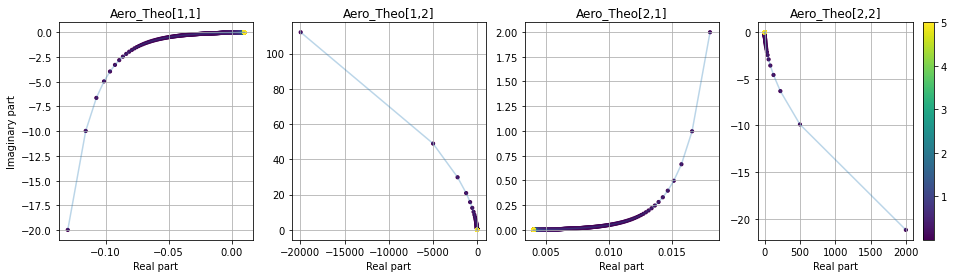

In [7]:
# Show the flutter derivatives for PAPA problem with Theodorsen's Aerodynamics
#  
nmax    = 5000; 
krange  = 1000;
nsteps = np.linspace(1, nmax, num=nmax)
mu  = 100.
a_h = -0.4   # defaul vlue of -0.5 gives purely imaginary flutter derivatives for the Aerodynamic Moment.

# Allocate the arrays
A11 = np.zeros((nmax), dtype=complex)
A12 = np.zeros((nmax), dtype=complex)
A21 = np.zeros((nmax), dtype=complex)
A22 = np.zeros((nmax), dtype=complex)
k_red = np.zeros((nmax), dtype=float)

for idx, val in enumerate(nsteps):   
    k = val/krange
    k_red   [idx] = k
    aero_matrix  = unsteady_aerodynamic_freq_Theodorsen_nbCN04 (k, mu, a_h)    
    A11 [idx]= aero_matrix[0,0]
    A12 [idx]= aero_matrix[0,1]
    A21 [idx]= aero_matrix[1,0]
    A22 [idx]= aero_matrix[1,1]

fig1=plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1)
plt.title('Aero_Theo[1,1]')
plt.plot(np.real(A11[:]),np.imag(A11[:]) ,'-',alpha=0.3)
#
t = k_red
plt.scatter(np.real(A11[:]),np.imag(A11[:]) ,c=t, cmap='viridis',s=40, marker='.')
#k_range[:],np.imag(y1[:]) ,'-',color="black",label="Exact",alpha=0.5)
#
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid(True)
#plt.axis([0, 8, -1.2, 1.2])

plt.subplot(1,4,2)
plt.title('Aero_Theo[1,2]')
#plt.axis([0, 8, 0, 1.2])  
plt.plot(np.real(A12[:]),np.imag(A12[:]) ,'-',alpha=0.3)
plt.scatter(np.real(A12[:]),np.imag(A12[:]) ,c=t, cmap='viridis',s=40, marker='.')
plt.xlabel('Real part')
#plt.ylabel('Imaginary part')
plt.grid(True)

plt.subplot(1, 4, 3)
plt.title('Aero_Theo[2,1]')
plt.plot(np.real(A21[:]),np.imag(A21[:]) ,'-',alpha=0.3)
plt.scatter(np.real(A21[:]),np.imag(A21[:]) ,c=t, cmap='viridis',s=40, marker='.')
#plt.plot(speed[1,:],damping[1,:] ,'-')
plt.xlabel('Real part')
#plt.ylabel('Imaginary part')
plt.grid(True)
#plt.axis([0, 8, -1.2, 1.2])

plt.subplot(1,4,4)
#plt.axis([0, 8, 0, 1.2])  
plt.title('Aero_Theo[2,2]')
plt.plot(np.real(A22[:]),np.imag(A22[:]) ,'-',alpha=0.3)
plt.scatter(np.real(A22[:]),np.imag(A22[:]) ,c=t, cmap='viridis',s=40, marker='.')
plt.xlabel('Real part')
plt.colorbar()
plt.grid(True)

###   2.2 Time-domain solution 



**Set the harmonic forced motion of the airfoil**


In [8]:
t_max = 20
t_min = 0
nbrun = 1000
freq  = 0.15 # Hz
b     = 0.5  # m
omega = 2.*np.pi*freq
time  = np.linspace(t_min, t_max, num=nbrun)

q1_bar= 0.1              # amplitude of xi=h/b (dimensionless)
q2_bar= 0.5/180*np.pi    # amplitude of alpha (rad)

rho   = 1.1
a1    = np.pi*rho*b**2
a_h   = 0.1            

In [9]:
def Compute_Faero_Theodorsen(q1_bar, q2_bar,a_h,rho,U,b):
    
    """..."""
    
    ic    = np.csingle(1j)
    L     = np.zeros((nbrun), dtype=float)   
    times = time*b/U
    
    k     = omega*b/U    
    for idx, t in enumerate(time):
        qh    = q1_bar * np.exp(ic*omega*t)
        qa    = q2_bar * np.exp(ic*omega*t)
        dqh   = ic*omega*qh
        dqa   = ic*omega*qa
        ddqh  = ic*omega*dqh
        ddqa  = ic*omega*dqa
        L_nc  = a1*(ddqh+U*dqa-a_h*b*ddqa) 
        L_cr  = 2*np.pi*rho*U*b*Ctheo_exact(k)*(qh + U*qa + b*(0.5-a_h)*dqa) 
        L     [idx] = np.real(L_nc + L_cr)

    return L, times

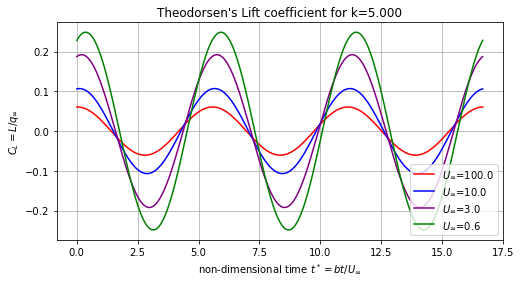

In [21]:
U1=100.
U2=10.
U3=3.
U4=0.6

L1,times=Compute_Faero_Theodorsen (q1_bar,q2_bar,a_h,rho,U1,b)
L2,times=Compute_Faero_Theodorsen (q1_bar,q2_bar,a_h,rho,U2,b)
L3,times=Compute_Faero_Theodorsen (q1_bar,q2_bar,a_h,rho,U3,b)
L4,times=Compute_Faero_Theodorsen (q1_bar,q2_bar,a_h,rho,U4,b)

fig1 = plt.figure(figsize=(8,4))
  
plt.plot(times, L1/(0.5*rho*U1**2), '-', color="red"   , label="$U_\infty$={0:.1f}".format(U1))
plt.plot(times, L2/(0.5*rho*U2**2), '-', color="blue"  , label="$U_\infty$={0:.1f}".format(U2))
plt.plot(times, L3/(0.5*rho*U3**2), '-', color="purple", label="$U_\infty$={0:.1f}".format(U3))
plt.plot(times, L4/(0.5*rho*U4**2), '-', color="green" , label="$U_\infty$={0:.1f}".format(U4))
    
plt.xlabel(r'non-dimensional time $t^*=bt/U_\infty$')
plt.ylabel(r'$C_L=L/q_\infty$')
plt.title("Theodorsen's Lift coefficient for k={0:.3f}".format(k))
plt.grid(True)
plt.legend(loc="lower right", frameon=True)

### 2.3 Solution of the flutter determinant


Now, the solution of the PAPA configurations studied using the p_method with steady aerodynamics in the previous notebook can be revisited using the fully unsteady aerodynamic operator from Therodorsen.

The numerical implementation is straightfoward and it is left as an exercise.


---------------------------------------------------------

## 2.4 To go further


Compare the Quasi-Steady aerodynamic therory versus the Theodorsen's theory.


The aerodynamic derivatives under the quasi-steady flow assumption can be derived from Eqs. (20-22) by considering $k\rightarrow 0$ 

\begin{eqnarray}
 \mathcal L_\xi &=& 0,   \qquad 
 \mathcal L_{\dot \xi} = 2\pi, \qquad
 \mathcal L_\alpha &=& 2 \pi , \qquad
 \mathcal M_\xi       &=& 0,   \qquad
 \mathcal M_{\dot\xi} &=& \pi (1+2a_h),   \qquad
 \mathcal M_\alpha    &=& \pi (2a_h+1)
\end{eqnarray} 


Note that $M_{\dot\xi}$ and $L_{\dot \alpha}$ become singular but $k L_{\dot \alpha} \rightarrow 0$ and $k M_{\dot\alpha}\rightarrow 0$.

#### References

[1] D.H. Hodges, G. A. Pierce, "Introduction to Structural Dynamics and Aeroelasticity ", Cambridge Aerospace series, 
ISBN 0-521-80698-4, 2002

[2] D.A. Peters, S. Karunamoorthy, W.-M. Cao, “Finite State Induced Flow Models; Part I: Two-Dimensional Thin Airfoil,” Journal of Aircraft, Vol. 32, No. 2, Mar.-Apr. 1995, pp. 313–322.

[3] T. T. Theodorsen, "General Theory of Aerodynamic Instability and the Mechanism of Flutter", NACA TR 496, 1934.

[4] H.J. Hassig, “An Approximate True Damping Solution of the Flutter Equation by Determinant Iteration,” Journal of Aircraft, Vol. 8, No. 11, Nov. 1971, pp. 885 – 889.

[5] E.H. Dowell, E.F. Crawley, H.C. Curtiss, Jr., D.A. Peters, R.H. Scanlan and F. Sisto, A Modern Course in Aeroelasticity, 3rd ed., Kluwer Academic Publishers, 1995.

[6] R.L. Bisplinghoff, H. Ashley and R.L. Halfman, Aeroelasticity, Addison-Wesley Publishing Co., Inc., 1955.

**Home work:** 

* Show that  
 \begin{eqnarray}   w_a(x,t) = -\dot h -\dot \alpha (x-a_h b) - U_\infty \alpha   \end{eqnarray}

In [11]:
def unsteady_aerodynamic_freq_Theodorsen (k, mu, a_h):
    """adapted from matlab code Vg_solver_ktest_Lee_JSV_2005.m; please re-demonstrate the equations
    """  
    #    
    ic  = np.csingle(1j)
    L_h = np.csingle() 
    L_a = np.csingle() 
    M_h = np.csingle() 
    M_a = np.csingle() 
    
    #print (k, mu, a_h)
    C   = Ctheo_exact(k)

    L_h = 1.-2.*ic*C/k;
    L_a = 0.5-ic*(1.+2.*C)/k-2.*C/k**2;
    M_h = 0.5;
    M_a = 3./8.-ic/k;
 
    aero_matrix = np.array([[L_h/mu, (L_a-(0.5+a_h)*L_h)/mu], \
                            [(M_h-(0.5+a_h)*L_h)/mu,  (M_a-(0.5+a_h)*(L_a+M_h)+L_h*(0.5+a_h)**2)/mu]])

    return aero_matrix